# Analiza i Bazy Danych
## Karol Musiał, grupa 3a
### Laboratorium 6
## "Exploratory Data Analysis"

In [14]:
# Importowanie
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns

# Wczytywanie danych
data = pd.read_csv('../Analysis Data/new_data.csv')
DF = pd.DataFrame(data)
DF

,Days,Brand,Age,Sex,Score
0,9,Beko,42.0,M,1.5
1,7,Dyson,56.0,M,3.5
2,9,Beko,33.0,M,2.0
3,8,Beko,41.0,M,5.0
4,8,Tefal,24.0,M,2.5
...,...,...,...,...,...
501,3,Beko,43.0,M,3.5
502,9,Samsung,42.0,M,1.5
503,9,Beko,NaN,M,1.5
504,6,Beko,32.0,M,1.0


### <b> Ogólny opis danych <b>

In [15]:
# Opis danych
DF.describe()

,Days,Age,Score
count,506.000000,458.000000,506.000000
mean,7.148221,39.554585,2.575099
std,2.619759,9.556367,1.075512
min,1.000000,18.000000,0.000000
25%,5.000000,33.000000,2.000000
50%,7.000000,40.000000,2.500000
75%,9.000000,45.000000,3.500000
max,15.000000,70.000000,5.000000


#### <b> Z powyższego opisu można odczytać, iż średnio urządzenie zostało zakupione tydzień przed zebraniem informacji, wiek przeciętnego kupującego to 40, a średnia nota to 2.5 w skali od 0 do 5.<b>

### <b> Średnie oceny wszystkich producentów. <b>

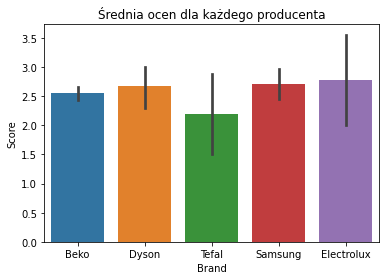

,Score
Brand,
Beko,2.546875
Dyson,2.666667
Electrolux,2.777778
Samsung,2.701389
Tefal,2.187500


In [16]:
# Wykres słupkowy producentów i ocen
sns.barplot(data=DF, x="Brand", y="Score")
plt.title('Średnia ocen dla każdego producenta')
plt.show()

# Tabela pokazująca średnią ocen producentów
DF.groupby('Brand')[['Score']].mean()

#### <b> Jak pokazano na wykresie oraz w tabeli, średnia ocen firmy Tefal znacząco odbiega od reszty. Pozostałe noty oscylują wokół 2.7, natomaist wspomniany producent osiąga niechwalebne 2.2.<b>

### <b> Oceny starszych osób <b>

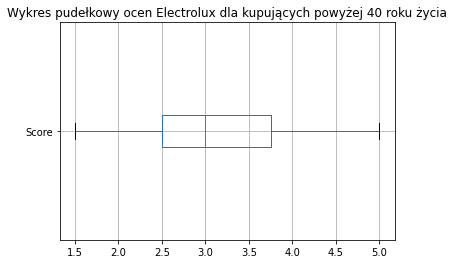

               Score
Brand               
Beko        2.512579
Dyson       2.892857
Electrolux  3.142857
Samsung     2.611111
Tefal       2.500000


Brand
Beko          159
Dyson          14
Electrolux      7
Samsung        36
Tefal           3
Name: Days, dtype: int64

In [17]:
# Nabywcy Electrolux powyżej 40 roku życia
Older = DF[DF['Age'] > 40]
Electrolux_Older = Older[Older['Brand'] == 'Electrolux']

# Wykres pudełkowy
Electrolux_Older[['Score']].boxplot(vert=False)
plt.title('Wykres pudełkowy ocen Electrolux dla kupujących powyżej 40 roku życia')
plt.show()

# Tabla obrazująca średnią ocen dla starszych kupujących
m_sc_old = Older.groupby('Brand')[['Score']].mean()
print(m_sc_old)

# Tabela pokazująca liczbę zakupów danego producenta dla osób starszych
ct_old = Older.groupby('Brand')['Days'].count()
ct_old

#### <b> Zdecydowana wiekszość osób powyżej 40 roku wybrała firmę Beko, jednak jednocześnie ocenili ją niemal najniżej. Najlepiej oceniony przez te grupę został Electrolux, który nie otrzymał niższej noty niż 1.5, zaś jego średnia przekroczyła 3.<b>

### <b> Wybory kobiet <b>

In [18]:
# Tabela prezentująca wybory kobiet
WM = DF[DF['Sex'] == 'K']
WM.groupby('Brand').count()

,Days,Age,Sex,Score
Brand,,,,
Beko,5,5,5,5
Dyson,1,1,1,1
Samsung,1,1,1,1


#### <b> Powyższa tabela nie jest do końca reprezentatywna ze względu na niewielką liczbę kobiet biorących udział w ankiecie, jednak jedyni producenci wybrani przez kobiety to: Beko, Dyson i Tefal, co więcej ponad 70% z nich wybrało Beko.<b>

### <b> Długość użytkowania a zadowolenie <b>

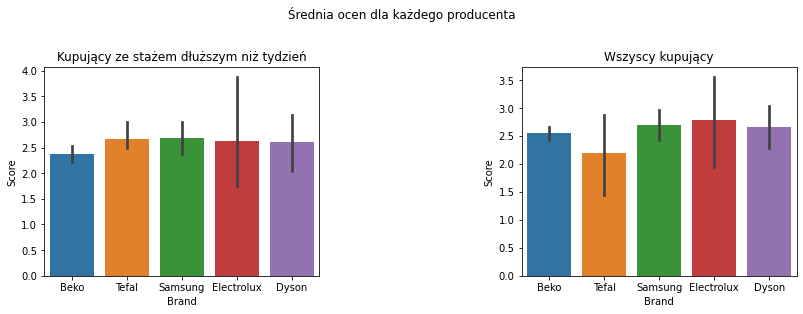

Brand
Beko          2.375000
Dyson         2.600000
Electrolux    2.625000
Samsung       2.676471
Tefal         2.666667
Name: Score, dtype: float64

In [19]:
# Osoby używające odkurzacza dłużej niż tydzień
week = DF[DF['Days'] > 7]

# Wykres słupkowy ocen producentów
figure, axes = plt.subplots(1, 2)
figure.tight_layout(pad=5.0)
figure.set_figheight(5)
figure.set_figwidth(15)
sns.barplot(data=week, x="Brand", y="Score", ax=axes[0], order=['Beko', 'Tefal', 'Samsung', 'Electrolux', 'Dyson'])
sns.barplot(data=DF, x="Brand", y="Score", ax=axes[1], order=['Beko', 'Tefal', 'Samsung', 'Electrolux', 'Dyson'])
plt.suptitle('Średnia ocen dla każdego producenta')
axes[0].title.set_text('Kupujący ze stażem dłuższym niż tydzień')
axes[1].title.set_text('Wszyscy kupujący')
plt.show()

# Tabela z ocenami producentów
week.groupby('Brand')['Score'].mean()

#### <b> Bardzo ciekawym zjawiskiem jest fakt, że osoby korzystające z urządzenia dłużej niż tydzien zdecydowanie lepiej oceniają firmę Tefal. Tefal ma zdecydowanie niższą średnia względem wszystkich badanych, jednak ci z większym doświadczeniem w używaniu urządzenia oceniają właśnie tego producenta lepiej.<b>

### <b> Najstarsi i najmłodsi <b>

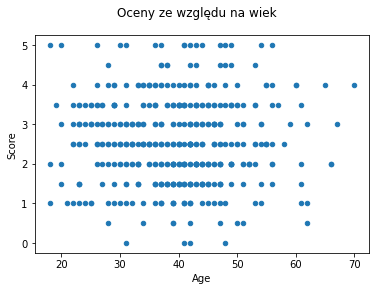

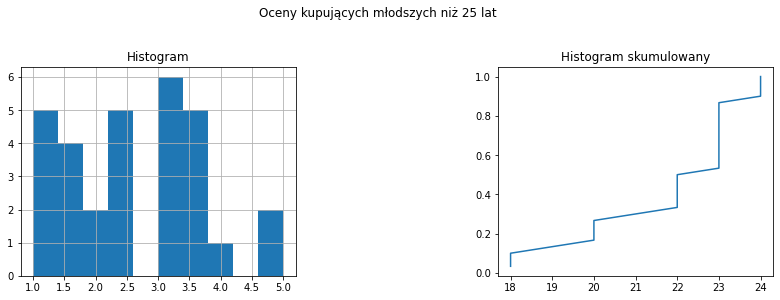

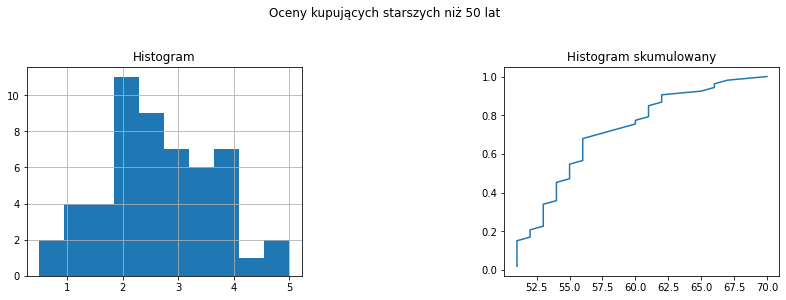

In [22]:
# Grupa najstarszych i najmłodszych
Younger = DF[DF['Age'] < 25]
Older = DF[DF['Age'] > 50]

# Wykres ocen dla grupy wiekowej
DF.plot.scatter(x='Age',y='Score',marker='o')
plt.suptitle('Oceny ze względu na wiek')
plt.show()

# Histogramy i histogramy skumulowane dla obu grup
ecdf = ECDF(Younger['Age'])
figure, axes = plt.subplots(1, 2)
figure.tight_layout(pad=5.0)
figure.set_figheight(5)
figure.set_figwidth(15)
Younger['Score'].hist(ax=axes[0])
plt.plot(ecdf.x, ecdf.y)
plt.suptitle('Oceny kupujących młodszych niż 25 lat')
axes[0].title.set_text('Histogram')
axes[1].title.set_text('Histogram skumulowany')
plt.show()

ecdf = ECDF(Older['Age'])
figure, axes = plt.subplots(1, 2)
figure.tight_layout(pad=5.0)
figure.set_figheight(5)
figure.set_figwidth(15)
Older['Score'].hist(ax=axes[0])
plt.plot(ecdf.x, ecdf.y)
plt.suptitle('Oceny kupujących starszych niż 50 lat')
axes[0].title.set_text('Histogram')
axes[1].title.set_text('Histogram skumulowany')
plt.show()

#### <b> Można zauważyć, że najmłodsza grupa kupująych stroni od wystawiania najgorszej oceny, zamiast tego względnie często wystawia ocene najwyższą. Grupa najstrasza natomiast, nie wystawia ani ocen najlepszych ani najgorszych. Dobrze obrazują to wklęsłość i wypukłość histogramów skumulowanych dla obu tych grup wiekowych. <b>

### <b> Dokładna analiza każdego producenta <b>

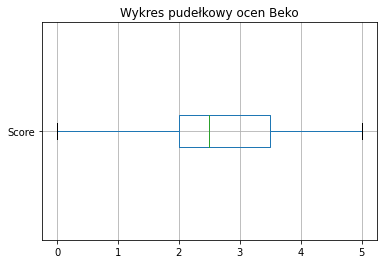

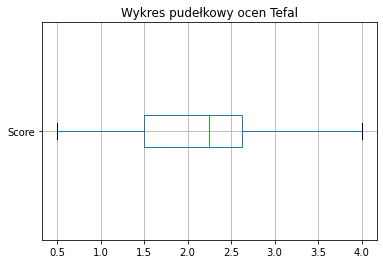

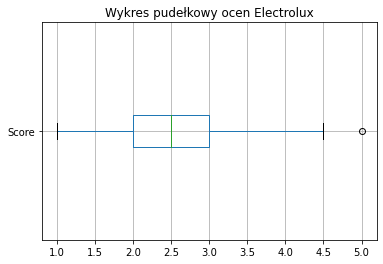

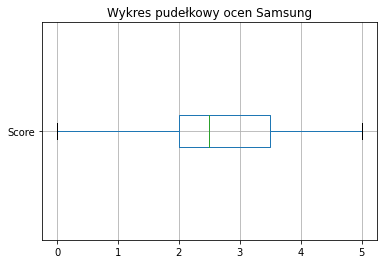

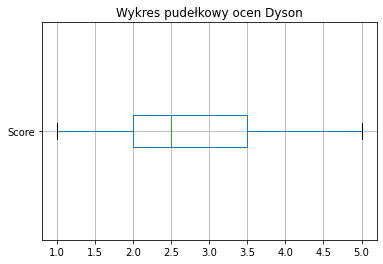

In [21]:
# Grupy które kupiły danego producenta
Beko = DF[DF['Brand'] == 'Beko']
Tefal = DF[DF['Brand'] == 'Tefal']
Electrolux = DF[DF['Brand'] == 'Electrolux']
Samsung = DF[DF['Brand'] == 'Samsung']
Dyson = DF[DF['Brand'] == 'Dyson']

# Wykresy pudełkowe
Beko[['Score']].boxplot(vert=False)
plt.title('Wykres pudełkowy ocen Beko')
plt.show()
Tefal[['Score']].boxplot(vert=False)
plt.title('Wykres pudełkowy ocen Tefal')
plt.show()
Electrolux[['Score']].boxplot(vert=False)
plt.title('Wykres pudełkowy ocen Electrolux')
plt.show()
Samsung[['Score']].boxplot(vert=False)
plt.title('Wykres pudełkowy ocen Samsung')
plt.show()
Dyson[['Score']].boxplot(vert=False)
plt.title('Wykres pudełkowy ocen Dyson')
plt.show()

#### <b> Na wykresach pudełkowych można zauważyć kilka rzeczy, przede wszystkim producenci Dyson, Electrolux oraz Tefal nie otrzymali oceny 0, dwaj pierwsi nie otrzymali oceny niższej niż 1. Najmniejszy rozstrzał ma oceny Electrolux, 25 oraz 75 kwantyl są od siebie oddalone o 1, natomiast Tefal nie otrzymał nigdy oceny wyższej niż 4. <b>